In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Using Pandas to pull data from excel files

file_path_Hoosier = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/TTC_data_matplotlib.xlsx"
file_path_Goodyear = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/TTC data/Round 8/Cornering Data/A1965raw42.xlsx"
file_path_Hoosier_S = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/TTC data/Round 8/Cornering Data/A1965raw6.xlsx"
data_H = pd.read_excel(file_path_Hoosier, sheet_name=['IA_4_250_lb_FZ'])
data_G = pd.read_excel(file_path_Goodyear, sheet_name=['250_lb_FZ'])
data_H_S = pd.read_excel(file_path_Hoosier_S, sheet_name=['IA_4_250_lb_FZ'])

# Sorting Different Seats into Data

Adata_H = data_H['IA_4_250_lb_FZ']
Adata_G = data_G['250_lb_FZ']
Adata_H_S = data_H_S['IA_4_250_lb_FZ']


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/TTC_data_matplotlib.xlsx'

Tire Stiffness vs. Slip Angle (found using Aidan's Averaging Method)

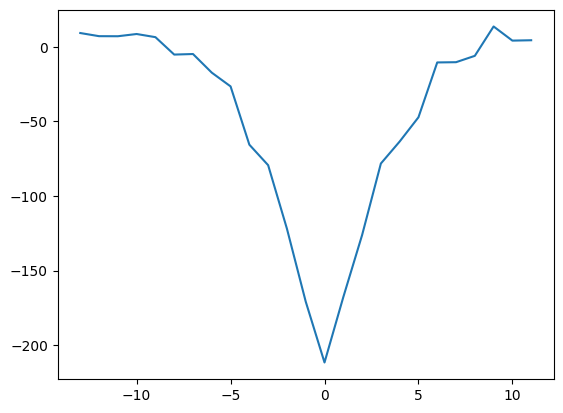

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import random

# Using Pandas to pull data from excel files

file_path_Hoosier = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/TTC_data_matplotlib.xlsx"

data_H = pd.read_excel(file_path_Hoosier, sheet_name=['IA_4_250_lb_FZ'])

# Sorting Different Sheets into Data

Adata_H = data_H['IA_4_250_lb_FZ']

# Removing Unecessary Collumns

Adata_H = Adata_H.drop(columns=['ET','V','N','IA','RL','RE','P','FX','FZ','MX','MZ','NFX','NFY','RST','TSTI','TSTC','TSTO','AMBTMP','SR'])

# Create
for i in [x/1 for x in range(-13, 13, 1)]:
    # get all rows with intervals between i and i+0.2
    rows = Adata_H.loc[((Adata_H['SA']) >= i) & ((Adata_H['SA']) < i + 0.1)]
    # get average values for each interval
    Adata_H.loc[i] = [i, rows['FY'].mean()]

SA = Adata_H['SA']

for i in Adata_H.index:   
    if i != SA[i]:
        Adata_H = Adata_H.drop([i])

Adata_H = Adata_H.sort_values(by='SA')

SA_avg = []
FY_avg = []

for i in Adata_H['SA']:
    SA_avg.append(i)

for i in Adata_H['FY']:
    FY_avg.append(i)

# Derivative of SA vs FY (C)

# Numerical Differentiation loop for averaged Data:
        
C_avg = []

for i in range(len(FY_avg)-1):

    if (SA_avg[i+1]-SA_avg[i]) != 0:
        dFYdSA = (FY_avg[i+1]-FY_avg[i])/(SA_avg[i+1]-SA_avg[i])
        C_avg.append(dFYdSA)

# Plotting SA vs FY
        
plt.plot(SA_avg[:-1],C_avg)
plt.show()

Tire Stiffness vs. Slip Angle (My Averaging Method)

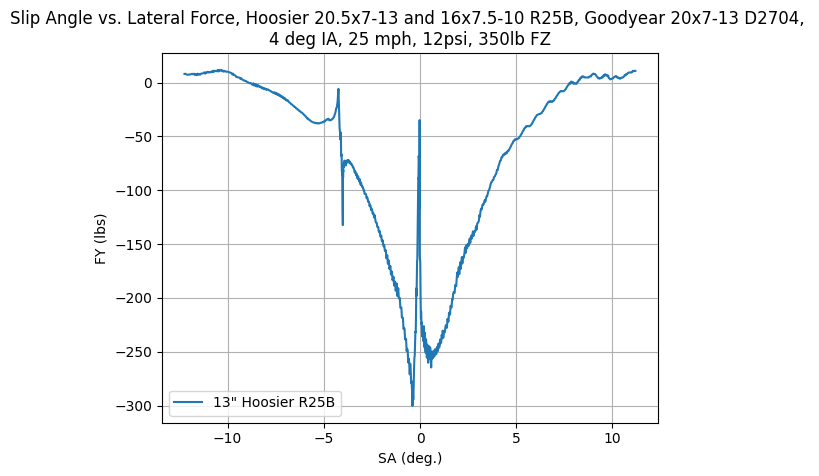

In [ ]:
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns

# Using Pandas to pull data from excel files

file_path_Hoosier = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/TTC_data_matplotlib.xlsx"

data_H = pd.read_excel(file_path_Hoosier, sheet_name=['350_lb_FZ'])

# Sorting Different Seats into Data

Adata_H = data_H['350_lb_FZ']

# Sorting Data into Tuples and Trimming (Hoosier R25B)

A_SA_H = Adata_H['SA']
A_SA_H = A_SA_H[1:]

A_FY_H = Adata_H['FY']
A_FY_H = A_FY_H[1:]

# Turning Pandas data into lists (Hoosier R25B)

A_SA_H_tup = []

for i in A_SA_H:
    A_SA_H_tup.append(i)

A_FY_H_tup = []

for i in A_FY_H:
    A_FY_H_tup.append(i)

# Variables for below averaging functions (Hoosier R25B)
    
A_SA_H_avg = []
A_FY_H_avg = []

# Averaging function for SA, takes average ever 20 data points (Hoosier R25B)

avg = 25

for i in range(len(A_SA_H_tup)-40):
    a_avg = A_SA_H_tup[i:i+40]
    a_avg = sum(a_avg)/(len(a_avg))
    A_SA_H_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (Hoosier R25B)
        
for i in range(len(A_FY_H_tup)-40):
    a_avg = A_FY_H_tup[i:i+40]
    a_avg = sum(a_avg)/(len(a_avg))
    A_FY_H_avg.append(a_avg)

# Finding Derivative

C_avg = []

for i in range(len(A_FY_H_avg)-1):

    if (A_SA_H_avg[i+1]-A_SA_H_avg[i]) != 0:
        dFYdSA = (A_FY_H_avg[i+1]-A_FY_H_avg[i])/(A_SA_H_avg[i+1]-A_SA_H_avg[i])
        C_avg.append(dFYdSA)

# converting data back into dataframe 

data_H = {'SA':A_SA_H_avg[:-1], 'FY':A_FY_H_avg[:-1], 'C':C_avg}

data_H = pd.DataFrame(data_H)

# Removing outliers

C = data_H['C']

for i in data_H.index:
    if (C[i] > 200) or (C[i]< -500):
        data_H = data_H.drop([i])

# converting dataframe back into lists

SA_lst = []

for i in data_H['SA']:
    SA_lst.append(i)

C_lst = []

for i in data_H['C']:
    C_lst.append(i)

# Averaging C data
    
C_avg = []

for i in range(len(C_lst)-20):
    a_avg = C_lst[i:i+20]
    a_avg = sum(a_avg)/(len(a_avg))
    C_avg.append(a_avg)

# Plotting

plt.plot(SA_lst[:-20], C_avg, label='13" Hoosier R25B')
plt.title('Slip Angle vs. Lateral Force, Hoosier 20.5x7-13 and 16x7.5-10 R25B, Goodyear 20x7-13 D2704, \n4 deg IA, 25 mph, 12psi, 350lb FZ')
plt.xlabel('SA (deg.)')
plt.ylabel('FY (lbs)')
plt.grid(True)
plt.legend()
plt.show()

Tire Stiffness vs. Slip Angle 
- Find SA vs. FY using non-dataframe method, i+20 method
- Find SA vs. C using dataframe, range(-13, 13, 0.1) method

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


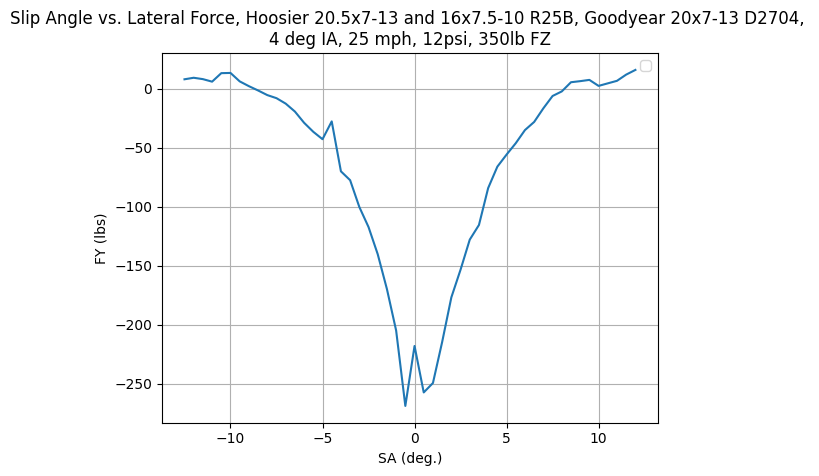

In [ ]:
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns

# Using Pandas to pull data from excel files

file_path_Hoosier = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/TTC_data_matplotlib.xlsx"

data_H = pd.read_excel(file_path_Hoosier, sheet_name=['350_lb_FZ'])

# Sorting Different Seats into Data

Adata_H = data_H['350_lb_FZ']

# Sorting Data into Tuples and Trimming (Hoosier R25B)

A_SA_H = Adata_H['SA']
A_SA_H = A_SA_H[1:]

A_FY_H = Adata_H['FY']
A_FY_H = A_FY_H[1:]

# Turning Pandas data into lists (Hoosier R25B)

A_SA_H_tup = []

for i in A_SA_H:
    A_SA_H_tup.append(i)

A_FY_H_tup = []

for i in A_FY_H:
    A_FY_H_tup.append(i)

# Variables for below averaging functions (Hoosier R25B)
    
A_SA_H_avg = []
A_FY_H_avg = []

# Averaging function for SA, takes average ever 20 data points (Hoosier R25B)

avg = 25

for i in range(len(A_SA_H_tup)-20):
    a_avg = A_SA_H_tup[i:i+20]
    a_avg = sum(a_avg)/(len(a_avg))
    A_SA_H_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (Hoosier R25B)
        
for i in range(len(A_FY_H_tup)-20):
    a_avg = A_FY_H_tup[i:i+20]
    a_avg = sum(a_avg)/(len(a_avg))
    A_FY_H_avg.append(a_avg)

# Converting Data into Dataframe
    
data_H = {'SA':A_SA_H_avg[:-1], 'FY':A_FY_H_avg[:-1]}

data_H = pd.DataFrame(data_H)

# Finding C using Aidan's Dataframe method:

for i in [x/10 for x in range(-135, 135, 5)]:
    # get all rows with intervals between i and i+0.2
    rows = data_H.loc[((data_H['SA']) > i-0.25) & ((data_H['SA']) < i + 0.25)]
    # get average values for each interval
    data_H.loc[i] = [i, rows['FY'].mean()]

# Removing unecessary data lines

SA = data_H['SA']

for i in data_H.index:   
    if i != SA[i]:
        data_H = data_H.drop([i])

data_H = data_H.sort_values(by='SA')

# Finding Derivatives

SA_lst = []
for i in data_H['SA']:
    SA_lst.append(i)

FY_lst = []
for i in data_H['FY']:
    FY_lst.append(i)

C_avg = []

for i in range(len(data_H['SA'])-1):
    if (SA_lst[i+1]-SA_lst[i]) != 0:
        dFYdSA = (FY_lst[i+1]-FY_lst[i])/(SA_lst[i+1]-SA_lst[i])
        C_avg.append(dFYdSA)

# Plotting

#plt.plot(A_SA_H_avg, A_FY_H_avg, label='13" Hoosier R25B')
#plt.scatter(data_H['SA'], data_H['FY'])
plt.plot(SA_lst[:-1], C_avg)
plt.title('Slip Angle vs. Lateral Force, Hoosier 20.5x7-13 and 16x7.5-10 R25B, Goodyear 20x7-13 D2704, \n4 deg IA, 25 mph, 12psi, 350lb FZ')
plt.xlabel('SA (deg.)')
plt.ylabel('FY (lbs)')
plt.grid(True)
plt.legend()
#plt.show()

Slip Angle vs. Lateral Force Hoosier 20.5x7.0-13 R25B

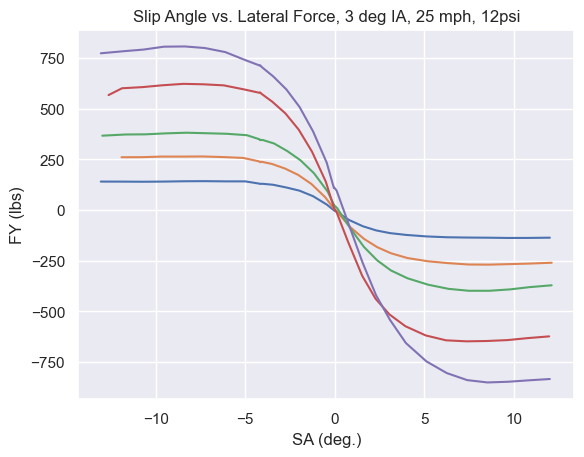

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Using Pandas to pull data from excel file

file_path = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/TTC_data_matplotlib.xlsx"
data = pd.read_excel(file_path, sheet_name=['50_lb_FZ','100_lb_FZ','150_lb_FZ','250_lb_FZ','350_lb_FZ'])

# Sorting Different Seats into Data

Adata = data['50_lb_FZ']
Bdata = data['100_lb_FZ']
Cdata = data['150_lb_FZ']
Ddata = data['250_lb_FZ']
Edata = data['350_lb_FZ']

# Sorting Data into Tuples and Trimming (50 lb)

A_SA = Adata['SA']
A_SA = A_SA[1:]

A_FY = Adata['FY']
A_FY = A_FY[1:]

# Turning Pandas data into tuples (50lb)

A_SA_tup = []

for i in A_SA:
    A_SA_tup.append(i)

A_FY_tup = []

for i in A_FY:
    A_FY_tup.append(i)

# Variables for below averaging functions (50lb)
    
A_SA_avg = []
A_FY_avg = []

a = 0
b = 0

c = 0
d = 0

# Averaging function for SA, takes average ever 20 data points (50lb)

avg = 25

for i in A_SA_tup:
    if b <= avg:
        a += i
        b += 1
    else:
        a_avg = a/avg
        A_SA_avg.append(a_avg)
        a = 0
        b = 0

# Averaging function for FY, takes average ever 20 data points (50lb)
        
for i in A_FY_tup:
    if d <= avg:
        c += i
        d += 1
    else:
        c_avg = c/avg
        A_FY_avg.append(c_avg)
        c = 0
        d = 0

# Sorting Data into Tuples and Trimming (50 lb)

B_SA = Bdata['SA']
A_SA = A_SA[1:]

B_FY = Bdata['FY']
B_FY = B_FY[1:]

# Turning Pandas data into tuples (50lb)

B_SA_tup = []

for i in B_SA:
    B_SA_tup.append(i)

B_FY_tup = []

for i in B_FY:
    B_FY_tup.append(i)

# Variables for below averaging functions (50lb)
    
B_SA_avg = []
B_FY_avg = []

a = 0
b = 0

c = 0
d = 0

# Averaging function for SA, takes average ever 20 data points (50lb)

avg = 25

for i in B_SA_tup:
    if b <= avg:
        a += i
        b += 1
    else:
        a_avg = a/avg
        B_SA_avg.append(a_avg)
        a = 0
        b = 0

# Averaging function for FY, takes average ever 20 data points (50lb)
        
for i in B_FY_tup:
    if d <= avg:
        c += i
        d += 1
    else:
        c_avg = c/avg
        B_FY_avg.append(c_avg)
        c = 0
        d = 0

# Sorting Data into Tuples and Trimming (150 lb)

C_SA = Cdata['SA']
C_SA = A_SA[1:]

C_FY = Cdata['FY']
C_FY = C_FY[1:]

# Turning Pandas data into tuples (150lb)

C_SA_tup = []

for i in C_SA:
    C_SA_tup.append(i)

C_FY_tup = []

for i in C_FY:
    C_FY_tup.append(i)

# Variables for below averaging functions (150lb)
    
C_SA_avg = []
C_FY_avg = []

a = 0
b = 0

c = 0
d = 0

# Averaging function for SA, takes average ever 20 data points (150lb)

avg = 25

for i in C_SA_tup:
    if b <= avg:
        a += i
        b += 1
    else:
        a_avg = a/avg
        C_SA_avg.append(a_avg)
        a = 0
        b = 0

# Averaging function for FY, takes average ever 20 data points (150lb)
        
for i in C_FY_tup:
    if d <= avg:
        c += i
        d += 1
    else:
        c_avg = c/avg
        C_FY_avg.append(c_avg)
        c = 0
        d = 0

# Sorting Data into Tuples and Trimming (250 lb)

D_SA = Ddata['SA']
D_SA = D_SA[1:]

D_FY = Ddata['FY']
D_FY = D_FY[1:]

# Turning Pandas data into tuples (250lb)

D_SA_tup = []

for i in D_SA:
    D_SA_tup.append(i)

D_FY_tup = []

for i in D_FY:
    D_FY_tup.append(i)

# Variables for below averaging functions (250lb)
    
D_SA_avg = []
D_FY_avg = []

a = 0
b = 0

c = 0
d = 0

# Averaging function for SA, takes average ever 20 data points (250lb)

avg = 25

for i in D_SA_tup:
    if b <= avg:
        a += i
        b += 1
    else:
        a_avg = a/avg
        D_SA_avg.append(a_avg)
        a = 0
        b = 0

# Averaging function for FY, takes average ever 20 data points (250lb)
        
for i in D_FY_tup:
    if d <= avg:
        c += i
        d += 1
    else:
        c_avg = c/avg
        D_FY_avg.append(c_avg)
        c = 0
        d = 0

# Sorting Data into Tuples and Trimming (350 lb)

E_SA = Edata['SA']
E_SA = E_SA[1:]

E_FY = Edata['FY']
E_FY = E_FY[1:]

# Turning Pandas data into tuples (350lb)

E_SA_tup = []

for i in E_SA:
    E_SA_tup.append(i)

E_FY_tup = []

for i in E_FY:
    E_FY_tup.append(i)

# Variables for below averaging functions (350lb)
    
E_SA_avg = []
E_FY_avg = []

a = 0
b = 0

c = 0
d = 0

# Averaging function for SA, takes average ever 20 data points (350lb)

avg = 25

for i in E_SA_tup:
    if b <= avg:
        a += i
        b += 1
    else:
        a_avg = a/avg
        E_SA_avg.append(a_avg)
        a = 0
        b = 0

# Averaging function for FY, takes average ever 20 data points (350lb)
        
for i in E_FY_tup:
    if d <= avg:
        c += i
        d += 1
    else:
        c_avg = c/avg
        E_FY_avg.append(c_avg)
        c = 0
        d = 0

# Plotting using Seaborn

#sns.set_theme()
#sns.relplot(data=(A_FY_avg), kind= 'line')
        
# Plotting using MatPlotLib
plt.plot(A_SA_avg, A_FY_avg)
plt.plot(B_SA_avg, B_FY_avg)
plt.plot(C_SA_avg, C_FY_avg)
plt.plot(D_SA_avg, D_FY_avg)
plt.plot(E_SA_avg, E_FY_avg)
plt.title('Slip Angle vs. Lateral Force, 3 deg IA, 25 mph, 12psi')
plt.xlabel('SA (deg.)')
plt.ylabel('FY (lbs)')
plt.grid(True)
plt.show()

Slip Angle vs. Alignment Torque Hoosier 20.5x7.0-13 R25B

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Using Pandas to pull data from excel file

file_path = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/TTC_data_matplotlib.xlsx"
data = pd.read_excel(file_path, sheet_name=['50_lb_FZ','100_lb_FZ','150_lb_FZ','250_lb_FZ','350_lb_FZ'])

# Sorting Different Seats into Data

Adata = data['50_lb_FZ']
Bdata = data['100_lb_FZ']
Cdata = data['150_lb_FZ']
Ddata = data['250_lb_FZ']
Edata = data['350_lb_FZ']

# Sorting Data into Tuples and Trimming (50 lb)

A_SA = Adata['SA']
A_SA = A_SA[1:]

A_MZ = Adata['MZ']
A_MZ = A_MZ[1:]

# Turning Pandas data into tuples (50lb)

A_SA_tup = []

for i in A_SA:
    A_SA_tup.append(i)

A_MZ_tup = []

for i in A_MZ:
    A_MZ_tup.append(i)

# Variables for below averaging functions (50lb)
    
A_SA_avg = []
A_MZ_avg = []

a = 0
b = 0

c = 0
d = 0

# Averaging function for SA, takes average ever 20 data points (50lb)

avg = 25

for i in A_SA_tup:
    if b <= avg:
        a += i
        b += 1
    else:
        a_avg = a/avg
        A_SA_avg.append(a_avg)
        a = 0
        b = 0

# Averaging function for MZ, takes average ever 20 data points (50lb)
        
for i in A_MZ_tup:
    if d <= avg:
        c += i
        d += 1
    else:
        c_avg = c/avg
        A_MZ_avg.append(c_avg)
        c = 0
        d = 0

# Sorting Data into Tuples and Trimming (100 lb)

B_SA = Bdata['SA']
B_SA = B_SA[1:]

B_MZ = Bdata['MZ']
B_MZ = B_MZ[1:]

# Turning Pandas data into tuples (100lb)

B_SA_tup = []

for i in B_SA:
    B_SA_tup.append(i)

B_MZ_tup = []

for i in B_MZ:
    B_MZ_tup.append(i)

# Variables for below averaging functions (50lb)
    
B_SA_avg = []
B_MZ_avg = []

a = 0
b = 0

c = 0
d = 0

# Averaging function for SA, takes average ever 20 data points (50lb)

avg = 25

for i in B_SA_tup:
    if b <= avg:
        a += i
        b += 1
    else:
        a_avg = a/avg
        B_SA_avg.append(a_avg)
        a = 0
        b = 0

# Averaging function for MZ, takes average ever 20 data points (50lb)
        
for i in B_MZ_tup:
    if d <= avg:
        c += i
        d += 1
    else:
        c_avg = c/avg
        B_MZ_avg.append(c_avg)
        c = 0
        d = 0

# Sorting Data into Tuples and Trimming (150 lb)

C_SA = Cdata['SA']
C_SA = A_SA[1:]

C_MZ = Cdata['MZ']
C_MZ = C_MZ[1:]

# Turning Pandas data into tuples (150lb)

C_SA_tup = []

for i in C_SA:
    C_SA_tup.append(i)

C_MZ_tup = []

for i in C_MZ:
    C_MZ_tup.append(i)

# Variables for below averaging functions (150lb)
    
C_SA_avg = []
C_MZ_avg = []

a = 0
b = 0

c = 0
d = 0

# Averaging function for SA, takes average ever 20 data points (150lb)

avg = 25

for i in C_SA_tup:
    if b <= avg:
        a += i
        b += 1
    else:
        a_avg = a/avg
        C_SA_avg.append(a_avg)
        a = 0
        b = 0

# Averaging function for MZ, takes average ever 20 data points (150lb)
        
for i in C_MZ_tup:
    if d <= avg:
        c += i
        d += 1
    else:
        c_avg = c/avg
        C_MZ_avg.append(c_avg)
        c = 0
        d = 0

# Sorting Data into Tuples and Trimming (250 lb)

D_SA = Ddata['SA']
D_SA = D_SA[1:]

D_MZ = Ddata['MZ']
D_MZ = D_MZ[1:]

# Turning Pandas data into tuples (250lb)

D_SA_tup = []

for i in D_SA:
    D_SA_tup.append(i)

D_MZ_tup = []

for i in D_MZ:
    D_MZ_tup.append(i)

# Variables for below averaging functions (250lb)
    
D_SA_avg = []
D_MZ_avg = []

a = 0
b = 0

c = 0
d = 0

# Averaging function for SA, takes average ever 20 data points (250lb)

avg = 20

for i in D_SA_tup:
    if b <= avg:
        a += i
        b += 1
    else:
        a_avg = a/avg
        D_SA_avg.append(a_avg)
        a = 0
        b = 0

# Averaging function for MZ, takes average ever 20 data points (250lb)
        
for i in D_MZ_tup:
    if d <= avg:
        c += i
        d += 1
    else:
        c_avg = c/avg
        D_MZ_avg.append(c_avg)
        c = 0
        d = 0

# Sorting Data into Tuples and Trimming (350 lb)

E_SA = Edata['SA']
E_SA = E_SA[1:]

E_MZ = Edata['MZ']
E_MZ = E_MZ[1:]

# Turning Pandas data into tuples (350lb)

E_SA_tup = []

for i in E_SA:
    E_SA_tup.append(i)

E_MZ_tup = []

for i in E_MZ:
    E_MZ_tup.append(i)

# Variables for below averaging functions (350lb)
    
E_SA_avg = []
E_MZ_avg = []

a = 0
b = 0

c = 0
d = 0

# Averaging function for SA, takes average ever 20 data points (350lb)

avg = 25

for i in E_SA_tup:
    if b <= avg:
        a += i
        b += 1
    else:
        a_avg = a/avg
        E_SA_avg.append(a_avg)
        a = 0
        b = 0

# Averaging function for MZ, takes average ever 20 data points (350lb)
        
for i in E_MZ_tup:
    if d <= avg:
        c += i
        d += 1
    else:
        c_avg = c/avg
        E_MZ_avg.append(c_avg)
        c = 0
        d = 0

plt.plot(A_SA_avg, A_MZ_avg)
plt.plot(B_SA_avg, B_MZ_avg)
plt.plot(C_SA_avg, C_MZ_avg)
plt.plot(D_SA_avg, D_MZ_avg)
plt.plot(E_SA_avg, E_MZ_avg)
plt.title('Alignment Torque vs. Lateral Force, 3 deg IA, 25 mph, 12psi')
plt.xlabel('SA (deg.)')
plt.ylabel('FY (lbs)')
plt.grid(True)
plt.show()

KeyboardInterrupt: 

Slip Angle vs. Lateral Force for Hoosier 20.5x7.0-13 R25B, Goodyear D2704, and Hoosier 16x7.5-10 R25B

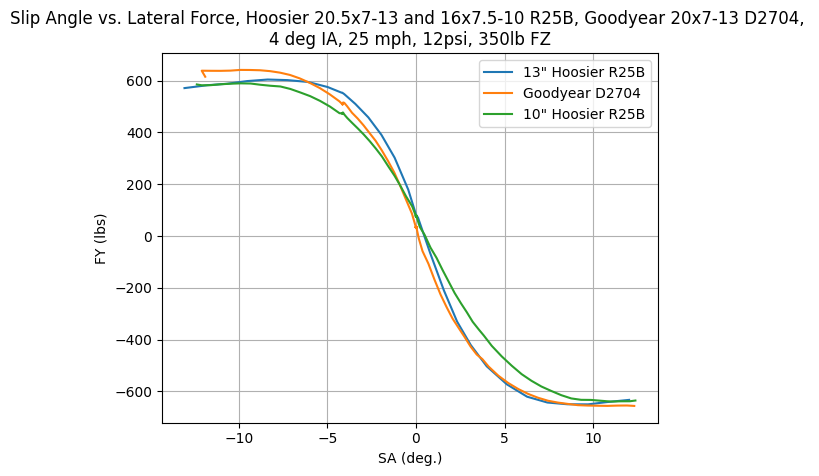

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Using Pandas to pull data from excel files

file_path_Hoosier = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/TTC_data_matplotlib.xlsx"
file_path_Goodyear = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/TTC data/Round 8/Cornering Data/A1965raw42.xlsx"
file_path_Hoosier_S = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/TTC data/Round 8/Cornering Data/A1965raw6.xlsx"

data_H = pd.read_excel(file_path_Hoosier, sheet_name=['IA_4_250_lb_FZ'])
data_G = pd.read_excel(file_path_Goodyear, sheet_name=['250_lb_FZ'])
data_H_S = pd.read_excel(file_path_Hoosier_S, sheet_name=['IA_4_250_lb_FZ'])

# Sorting Different Seats into Data

Adata_H = data_H['IA_4_250_lb_FZ']
Adata_G = data_G['250_lb_FZ']
Adata_H_S = data_H_S['IA_4_250_lb_FZ']

# Sorting Data into Tuples and Trimming (Hoosier R25B)

A_SA_H = Adata_H['SA']
A_SA_H = A_SA_H[1:]

A_FY_H = Adata_H['FY']
A_FY_H = A_FY_H[1:]

# Turning Pandas data into tuples (Hoosier R25B)

A_SA_H_tup = []

for i in A_SA_H:
    A_SA_H_tup.append(i)

A_FY_H_tup = []

for i in A_FY_H:
    A_FY_H_tup.append(i)

# Variables for below averaging functions (Hoosier R25B)
    
A_SA_H_avg = []
A_FY_H_avg = []

a = 0
b = 0

c = 0
d = 0

# Averaging function for SA, takes average ever 20 data points (Hoosier R25B)

avg = 25

for i in A_SA_H_tup:
    if b <= avg:
        a += i
        b += 1
    else:
        a_avg = a/avg
        A_SA_H_avg.append(a_avg)
        a = 0
        b = 0

# Averaging function for FY, takes average ever 20 data points (Hoosier R25B)
        
for i in A_FY_H_tup:
    if d <= avg:
        c += i
        d += 1
    else:
        c_avg = c/avg
        A_FY_H_avg.append(c_avg)
        c = 0
        d = 0

# Sorting Data into Tuples and Trimming (Goodyear D2704)

A_SA_G = Adata_G['SA']
A_SA_G = A_SA_G[1:]

A_FY_G = Adata_G['FY']
A_FY_G = A_FY_G[1:]

# Turning Pandas data into tuples (Goodyear D2704)

A_SA_G_tup = []

for i in A_SA_G:
    A_SA_G_tup.append(i)

A_FY_G_tup = []

for i in A_FY_G:
    A_FY_G_tup.append(i)

# Variables for below averaging functions (Goodyear D2704)
    
A_SA_G_avg = []
A_FY_G_avg = []

a = 0
b = 0

c = 0
d = 0

# Averaging function for SA, takes average ever 20 data points (Goodyear D2704)

avg = 25

for i in A_SA_G_tup:
    if b <= avg:
        a += i
        b += 1
    else:
        a_avg = a/avg
        A_SA_G_avg.append(a_avg)
        a = 0
        b = 0

# Averaging function for FY, takes average ever 20 data points (Goodyear D2704)
        
for i in A_FY_G_tup:
    if d <= avg:
        c += i
        d += 1
    else:
        c_avg = c/avg
        A_FY_G_avg.append(c_avg)
        c = 0
        d = 0

# Sorting Data into Tuples and Trimming (10" Hoosier R25B)

A_SA_H_S = Adata_H_S['SA']
A_SA_H_S = A_SA_H_S[2:]

A_FY_H_S = Adata_H_S['FY']
A_FY_H_S = A_FY_H_S[2:]

# Turning Pandas data into tuples (10" Hoosier R25B)

A_SA_H_S_tup = []

for i in A_SA_H_S:
    A_SA_H_S_tup.append(i)

A_FY_H_S_tup = []

for i in A_FY_H_S:
    A_FY_H_S_tup.append(i)

# Variables for below averaging functions (10" Hoosier R25B)
    
A_SA_H_S_avg = []
A_FY_H_S_avg = []

a = 0
b = 0

c = 0
d = 0

# Averaging function for SA, takes average ever 20 data points (10" Hoosier R25B)

avg = 25

for i in A_SA_H_S_tup:
    if b <= avg:
        a += i
        b += 1
    else:
        a_avg = a/avg
        A_SA_H_S_avg.append(a_avg)
        a = 0
        b = 0

# Averaging function for FY, takes average ever 20 data points (10" Hoosier R25B)
        
for i in A_FY_H_S_tup:
    if d <= avg:
        c += i
        d += 1
    else:
        c_avg = c/avg
        A_FY_H_S_avg.append(c_avg)
        c = 0
        d = 0

# Plotting

plt.plot(A_SA_H_avg, A_FY_H_avg, label='13" Hoosier R25B')
plt.plot(A_SA_G_avg, A_FY_G_avg, label='Goodyear D2704')
plt.plot(A_SA_H_S_avg, A_FY_H_S_avg, label='10" Hoosier R25B')
plt.title('Slip Angle vs. Lateral Force, Hoosier 20.5x7-13 and 16x7.5-10 R25B, Goodyear 20x7-13 D2704, \n4 deg IA, 25 mph, 12psi, 350lb FZ')
plt.xlabel('SA (deg.)')
plt.ylabel('FY (lbs)')
plt.grid(True)
plt.legend()
plt.show()

Slip Angle vs. Aligning Torque for Hoosier 20.5x7.0-13 R25B, Goodyear D2704, and Hoosier 16x7.5-10 R25B

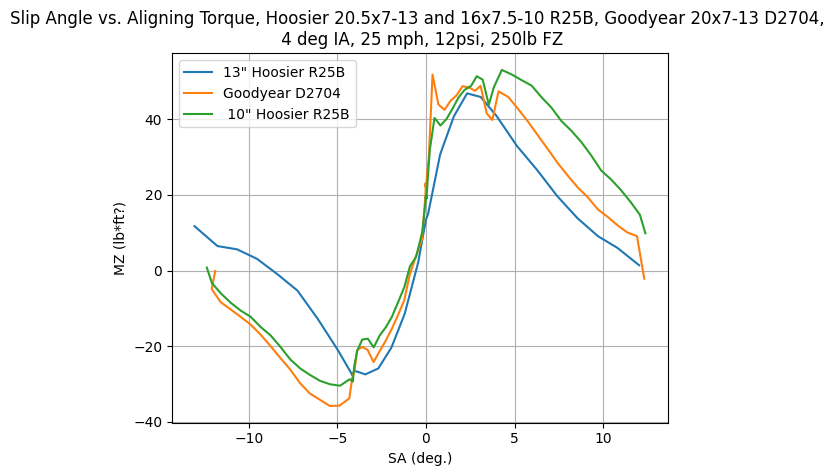

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Using Pandas to pull data from excel files

file_path_Hoosier = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/TTC_data_matplotlib.xlsx"
file_path_Goodyear = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/TTC data/Round 8/Cornering Data/A1965raw42.xlsx"
file_path_Hoosier_S = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/TTC data/Round 8/Cornering Data/A1965raw6.xlsx"
data_H = pd.read_excel(file_path_Hoosier, sheet_name=['IA_4_250_lb_FZ'])
data_G = pd.read_excel(file_path_Goodyear, sheet_name=['250_lb_FZ'])
data_H_S = pd.read_excel(file_path_Hoosier_S, sheet_name=['IA_4_250_lb_FZ'])

# Sorting Different Seats into Data

Adata_H = data_H['IA_4_250_lb_FZ']
Adata_G = data_G['250_lb_FZ']
Adata_H_S = data_H_S['IA_4_250_lb_FZ']

# Sorting Data into Tuples and Trimming (Hoosier R25B)

A_SA_H = Adata_H['SA']
A_SA_H = A_SA_H[1:]

A_MZ_H = Adata_H['MZ']
A_MZ_H = A_MZ_H[1:]

# Turning Pandas data into tuples (Hoosier R25B)

A_SA_H_tup = []

for i in A_SA_H:
    A_SA_H_tup.append(i)

A_MZ_H_tup = []

for i in A_MZ_H:
    A_MZ_H_tup.append(i)

# Variables for below averaging functions (Hoosier R25B)
    
A_SA_H_avg = []
A_MZ_H_avg = []

a = 0
b = 0

c = 0
d = 0

# Averaging function for SA, takes average ever 20 data points (Hoosier R25B)

avg = 25

for i in A_SA_H_tup:
    if b <= avg:
        a += i
        b += 1
    else:
        a_avg = a/avg
        A_SA_H_avg.append(a_avg)
        a = 0
        b = 0

# Averaging function for MZ, takes average ever 20 data points (Hoosier R25B)
        
for i in A_MZ_H_tup:
    if d <= avg:
        c += i
        d += 1
    else:
        c_avg = c/avg
        A_MZ_H_avg.append(c_avg)
        c = 0
        d = 0

# Sorting Data into Tuples and Trimming (Goodyear D2704)

A_SA_G = Adata_G['SA']
A_SA_G = A_SA_G[1:]

A_MZ_G = Adata_G['MZ']
A_MZ_G = A_MZ_G[1:]

# Turning Pandas data into tuples (Goodyear D2704)

A_SA_G_tup = []

for i in A_SA_G:
    A_SA_G_tup.append(i)

A_MZ_G_tup = []

for i in A_MZ_G:
    A_MZ_G_tup.append(i)

# Variables for below averaging functions (Goodyear D2704)
    
A_SA_G_avg = []
A_MZ_G_avg = []

a = 0
b = 0

c = 0
d = 0

# Averaging function for SA, takes average ever 20 data points (Goodyear D2704)

avg = 25

for i in A_SA_G_tup:
    if b <= avg:
        a += i
        b += 1
    else:
        a_avg = a/avg
        A_SA_G_avg.append(a_avg)
        a = 0
        b = 0

# Averaging function for MZ, takes average ever 20 data points (Goodyear D2704)
        
for i in A_MZ_G_tup:
    if d <= avg:
        c += i
        d += 1
    else:
        c_avg = c/avg
        A_MZ_G_avg.append(c_avg)
        c = 0
        d = 0

# Sorting Data into Tuples and Trimming (10" Hoosier R25B)

A_SA_H_S = Adata_H_S['SA']
A_SA_H_S = A_SA_H_S[2:]

A_MZ_H_S = Adata_H_S['MZ']
A_MZ_H_S = A_MZ_H_S[2:]

# Turning Pandas data into tuples (10" Hoosier R25B)

A_SA_H_S_tup = []

for i in A_SA_H_S:
    A_SA_H_S_tup.append(i)

A_MZ_H_S_tup = []

for i in A_MZ_H_S:
    A_MZ_H_S_tup.append(i)

# Variables for below averaging functions (10" Hoosier R25B)
    
A_SA_H_S_avg = []
A_MZ_H_S_avg = []

a = 0
b = 0

c = 0
d = 0

# Averaging function for SA, takes average ever 20 data points (10" Hoosier R25B)

avg = 25

for i in A_SA_H_S_tup:
    if b <= avg:
        a += i
        b += 1
    else:
        a_avg = a/avg
        A_SA_H_S_avg.append(a_avg)
        a = 0
        b = 0

# Averaging function for MZ, takes average ever 20 data points (10" Hoosier R25B)
        
for i in A_MZ_H_S_tup:
    if d <= avg:
        c += i
        d += 1
    else:
        c_avg = c/avg
        A_MZ_H_S_avg.append(c_avg)
        c = 0
        d = 0

# Plotting

plt.plot(A_SA_H_avg, A_MZ_H_avg, label='13" Hoosier R25B')
plt.plot(A_SA_G_avg, A_MZ_G_avg, label='Goodyear D2704')
plt.plot(A_SA_H_S_avg, A_MZ_H_S_avg, label=' 10" Hoosier R25B')
plt.title('Slip Angle vs. Aligning Torque, Hoosier 20.5x7-13 and 16x7.5-10 R25B, Goodyear 20x7-13 D2704, \n 4 deg IA, 25 mph, 12psi, 250lb FZ')
plt.xlabel('SA (deg.)')
plt.ylabel('MZ (lb*ft?)')
plt.grid(True)
plt.legend()
plt.show()

Example Code by Aidan showing how to sort data

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import random

columns = ['intervals', 'value0', 'value1']
# make a pandas dataframe with 500 rows filled with random data. Mkae the intervals random values between 0-1000
df = pd.DataFrame(columns=columns)
for i in range(0, 5000):
    df.loc[i] = [random.randint(0, 1000), random.randint(0, 100), random.randint(0, 100)]
    
# make second dataframe with averaged values for each interval [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# also, remove outliers when taking average using sklearn
df2 = pd.DataFrame(columns=columns)
for i in range(0, 1000, 200):
    # get all rows with intervals between i and i+100
    rows = df.loc[(df['intervals'] >= i) & (df['intervals'] < i + 200)]
    # remove outliers NOTE: How you remove outliers is up to you, this grabs everything with < 3 std devs
    rows = rows[(np.abs(stats.zscore(rows)) < 3).all(axis=1)]
    # get average values for each interval
    df2.loc[i] = [i, rows['value0'].mean(), rows['value1'].mean()]

print(df2)

     intervals     value0     value1
0          0.0  50.623160  48.799804
200      200.0  48.494461  51.832830
400      400.0  50.198567  50.220061
600      600.0  50.175147  49.587084
800      800.0  49.010194  50.364934


Using Aidan's code to average data:

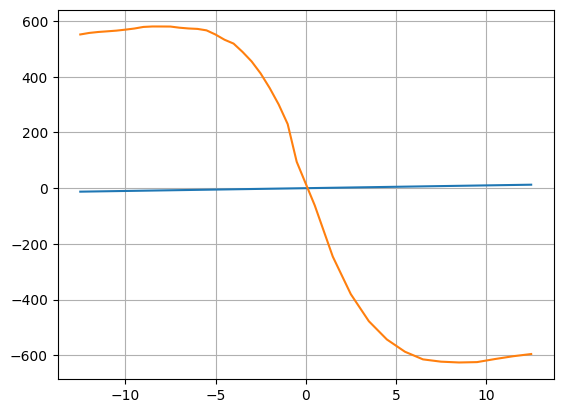

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import random

# Using Pandas to pull data from excel files

file_path_Hoosier = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/TTC_data_matplotlib.xlsx"

data_H = pd.read_excel(file_path_Hoosier, sheet_name=['IA_4_250_lb_FZ'])

# Sorting Different Sheets into Data

Adata_H = data_H['IA_4_250_lb_FZ']

# Removing Unecessary Collumns

Adata_H = Adata_H.drop(columns=['ET','V','N','IA','RL','RE','P','FX','FZ','MX','MZ','NFX','NFY','RST','TSTI','TSTC','TSTO','AMBTMP','SR'])

# Create
for i in [x/10 for x in range(-130, 130, 5)]:
    # get all rows with intervals between i and i+0.2
    rows = Adata_H.loc[((Adata_H['SA']) >= i) & ((Adata_H['SA']) < i + 0.5)]
    # get average values for each interval
    Adata_H.loc[i] = [i, rows['FY'].mean()]

plt.plot(Adata_H[-12.5:12.5])
plt.grid(True)
plt.show()

Slip Ratio vs. Longitudinal Velocity for Hoosier 20.5x7.0-13 R25B, Goodyear D2704, and Hoosier 16x7.5-10 R25B

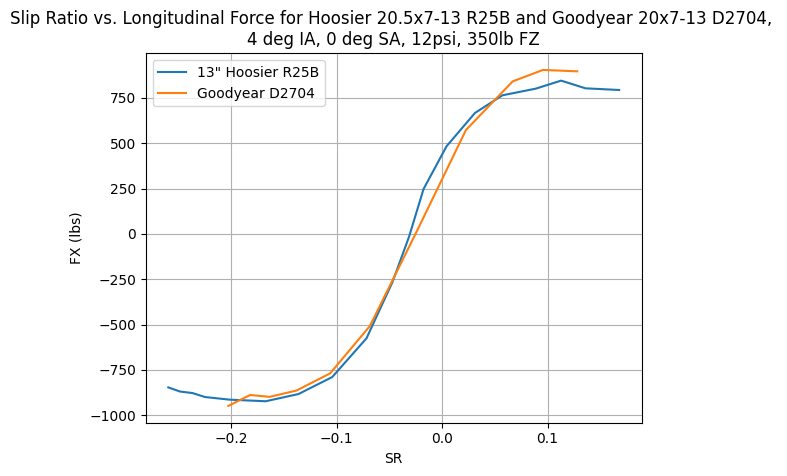

In [ ]:
# Using Pandas to pull data from excel files

file_path_Hoosier = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/TTC data/Round 4/Raw Data/Brake-Accel Data/A1320run125_(12psi).xlsx"
file_path_Goodyear = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/TTC data/Round 8/DriveBrake/A1965run57.xlsx"
file_path_Hoosier_S = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/TTC data/Round 8/Cornering Data/A1965raw6.xlsx"

data_H = pd.read_excel(file_path_Hoosier, sheet_name=['350_lb_FZ'])
data_G = pd.read_excel(file_path_Goodyear, sheet_name=['350_lb_FZ'])
data_H_S = pd.read_excel(file_path_Hoosier_S, sheet_name=['IA_4_250_lb_FZ'])

# Sorting Different Seats into Data

Adata_H = data_H['350_lb_FZ']
Adata_G = data_G['350_lb_FZ']
Adata_H_S = data_H_S['IA_4_250_lb_FZ']

# Sorting Data into Tuples and Trimming (Hoosier R25B)

A_SR_H = Adata_H['SR']
A_SR_H = A_SR_H[1:]

A_FX_H = Adata_H['FX']
A_FX_H = A_FX_H[1:]

# Turning Pandas data into lists (Hoosier R25B)

A_SR_H_tup = []

for i in A_SR_H:
    A_SR_H_tup.append(i)

A_FX_H_tup = []

for i in A_FX_H:
    A_FX_H_tup.append(i)

# Variables for below averaging functions (Hoosier R25B)
    
A_SR_H_avg = []
A_FX_H_avg = []

a = 0
b = 0

c = 0
d = 0

# Averaging function for SR, takes average ever 20 data points (Hoosier R25B)

avg = 25

for i in A_SR_H_tup:
    if b <= avg:
        a += i
        b += 1
    else:
        a_avg = a/avg
        A_SR_H_avg.append(a_avg)
        a = 0
        b = 0

# Averaging function for FX, takes average ever 20 data points (Hoosier R25B)
        
for i in A_FX_H_tup:
    if d <= avg:
        c += i
        d += 1
    else:
        c_avg = c/avg
        A_FX_H_avg.append(c_avg)
        c = 0
        d = 0

# Sorting Data into Tuples and Trimming (Goodyear D2704)

A_SR_G = Adata_G['SR']
A_SR_G = A_SR_G[1:]

A_FX_G = Adata_G['FX']
A_FX_G = A_FX_G[1:]

# Turning Pandas data into tuples (Goodyear D2704)

A_SR_G_tup = []

for i in A_SR_G:
    A_SR_G_tup.append(i)

A_FX_G_tup = []

for i in A_FX_G:
    A_FX_G_tup.append(i)

# Variables for below averaging functions (Goodyear D2704)
    
A_SR_G_avg = []
A_FX_G_avg = []

a = 0
b = 0

c = 0
d = 0

# Averaging function for SR, takes average ever 20 data points (Goodyear D2704)

avg = 25

for i in A_SR_G_tup:
    if b <= avg:
        a += i
        b += 1
    else:
        a_avg = a/avg
        A_SR_G_avg.append(a_avg)
        a = 0
        b = 0

# Averaging function for FX, takes average ever 20 data points (Goodyear D2704)
        
for i in A_FX_G_tup:
    if d <= avg:
        c += i
        d += 1
    else:
        c_avg = c/avg
        A_FX_G_avg.append(c_avg)
        c = 0
        d = 0

# Sorting Data into Tuples and Trimming (10" Hoosier R25B)

A_SR_H_S = Adata_H_S['SR']
A_SR_H_S = A_SR_H_S[2:]

A_FX_H_S = Adata_H_S['FX']
A_FX_H_S = A_FX_H_S[2:]

# Turning Pandas data into tuples (10" Hoosier R25B)

A_SR_H_S_tup = []

for i in A_SR_H_S:
    A_SR_H_S_tup.append(i)

A_FX_H_S_tup = []

for i in A_FX_H_S:
    A_FX_H_S_tup.append(i)

# Variables for below averaging functions (10" Hoosier R25B)
    
A_SR_H_S_avg = []
A_FX_H_S_avg = []

a = 0
b = 0

c = 0
d = 0

# Averaging function for SR, takes average ever 20 data points (10" Hoosier R25B)

avg = 25

for i in A_SR_H_S_tup:
    if b <= avg:
        a += i
        b += 1
    else:
        a_avg = a/avg
        A_SR_H_S_avg.append(a_avg)
        a = 0
        b = 0

# Averaging function for FX, takes average ever 20 data points (10" Hoosier R25B)
        
for i in A_FX_H_S_tup:
    if d <= avg:
        c += i
        d += 1
    else:
        c_avg = c/avg
        A_FX_H_S_avg.append(c_avg)
        c = 0
        d = 0

# Plotting

plt.plot(A_SR_H_avg, A_FX_H_avg, label='13" Hoosier R25B')
plt.plot(A_SR_G_avg, A_FX_G_avg, label='Goodyear D2704')
#plt.plot(A_SR_H_S_avg, A_FX_H_S_avg, label='10" Hoosier R25B')
plt.title('Slip Ratio vs. Longitudinal Force, Hoosier 20.5x7-13 R25B and Goodyear 20x7-13 D2704, \n4 deg IA, 0 deg SA, 12psi, 350lb FZ')
plt.xlabel('SR')
plt.ylabel('FX (lbs)')
plt.grid(True)
plt.legend()
plt.show()

New Averaging Method

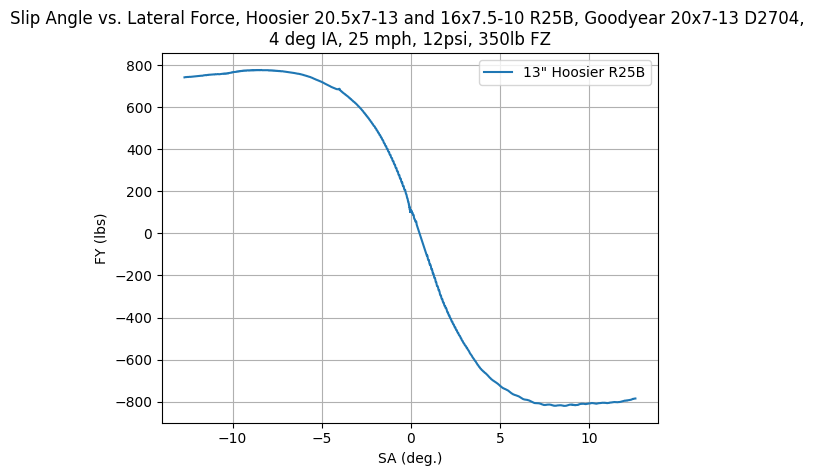

In [ ]:
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns

# Using Pandas to pull data from excel files

file_path_Hoosier = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/TTC_data_matplotlib.xlsx"

data_H = pd.read_excel(file_path_Hoosier, sheet_name=['350_lb_FZ'])

# Sorting Different Seats into Data

Adata_H = data_H['350_lb_FZ']

# Sorting Data into Tuples and Trimming (Hoosier R25B)

A_SA_H = Adata_H['SA']
A_SA_H = A_SA_H[1:]

A_FY_H = Adata_H['FY']
A_FY_H = A_FY_H[1:]

# Turning Pandas data into lists (Hoosier R25B)

A_SA_H_tup = []

for i in A_SA_H:
    A_SA_H_tup.append(i)

A_FY_H_tup = []

for i in A_FY_H:
    A_FY_H_tup.append(i)

# Variables for below averaging functions (Hoosier R25B)
    
A_SA_H_avg = []
A_FY_H_avg = []

# Averaging function for SA, takes average ever 20 data points (Hoosier R25B)

avg = 25

for i in range(len(A_SA_H_tup)-20):
    a_avg = A_SA_H_tup[i:i+20]
    a_avg = sum(a_avg)/(len(a_avg))
    A_SA_H_avg.append(a_avg)

# Averaging function for FY, takes average ever 20 data points (Hoosier R25B)
        
for i in range(len(A_FY_H_tup)-20):
    a_avg = A_FY_H_tup[i:i+20]
    a_avg = sum(a_avg)/(len(a_avg))
    A_FY_H_avg.append(a_avg)

# Plotting

plt.plot(A_SA_H_avg, A_FY_H_avg, label='13" Hoosier R25B')
plt.title('Slip Angle vs. Lateral Force, Hoosier 20.5x7-13 and 16x7.5-10 R25B, Goodyear 20x7-13 D2704, \n4 deg IA, 25 mph, 12psi, 350lb FZ')
plt.xlabel('SA (deg.)')
plt.ylabel('FY (lbs)')
plt.grid(True)
plt.legend()
plt.show()

Literally just trying to understand dataframes

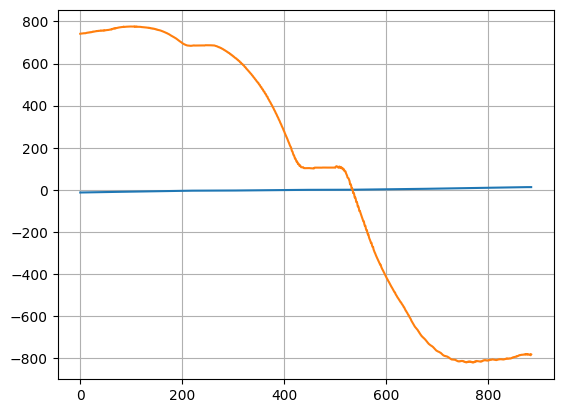

RangeIndex(start=0, stop=885, step=1)


In [ ]:
# Using Pandas to pull data from excel files

file_path_Hoosier = "C:/Users/maxwe/Downloads/FSAE/2023-2024 Car/TTC_data_matplotlib.xlsx"

data_H = pd.read_excel(file_path_Hoosier, sheet_name=['350_lb_FZ'])

# Sorting Different Sheets into Data

Adata_H = data_H['350_lb_FZ']

# Removing Unecessary Collumns

Adata_H = Adata_H.drop(columns=['ET','V','N','IA','RL','RE','P','FX','FZ','MX','MZ','NFX','NFY','RST','TSTI','TSTC','TSTO','AMBTMP','SR'])

for i in Adata_H.index:
    avg = Adata_H.loc[i:(i+20)]
    Adata_H.loc[i] = [avg['SA'].mean(), avg['FY'].mean()]

# Create
#for i in [x/10 for x in range(-130, 130, 5)]:
    # get all rows with intervals between i and i+0.2
    #rows = Adata_H.loc[((Adata_H['SA']) >= i) & ((Adata_H['SA']) < i + 0.5)]
    # get average values for each interval
    #Adata_H.loc[i] = [i, rows['FY'].mean()]

plt.plot(Adata_H)
plt.grid(True)
plt.show()

print(Adata_H.index)